In [12]:
from pynq import Overlay
import numpy as np
import matplotlib.pyplot as plt

regs = fir_ip._registers
for name, info in regs.items():
    print(f"{name:10s}: 0x{info['address_offset']:02x}")

CTRL      : 0x00
GIER      : 0x04
IP_IER    : 0x08
IP_ISR    : 0x0c
y         : 0x10
y_ctrl    : 0x14
x         : 0x20


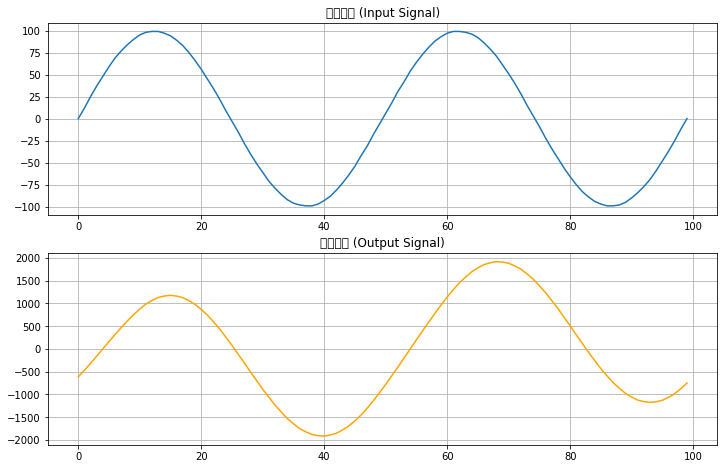

In [30]:
X_REG = 0x20
Y_DATA_REG = 0x10 
CTRL_REG = 0x00

sample_count = 100
input_signal = np.sin(np.linspace(0, 4*np.pi, sample_count)) * 100 
input_signal = input_signal.astype(np.int16) 
output_signal = np.zeros(sample_count, dtype=np.int16) 

for i in range(sample_count): 
    fir_ip.write(X_REG, int(input_signal[i])) 
    fir_ip.write(CTRL_REG, 1) 
    while (fir_ip.read(CTRL_REG) & 0x2) == 0: 
        pass 
    output_signal[i] = fir_ip.read(Y_DATA_REG) 

plt.figure(figsize=(12, 12)) 
plt.subplot(3, 1, 1) 
plt.plot(input_signal) 
plt.title('輸入信號 (Input Signal)') 
plt.grid(True) 

plt.subplot(3, 1, 2) 
plt.plot(output_signal, color='orange') 
plt.title('輸出信號 (Output Signal)') 
plt.grid(True)